In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

def load_df(file_name):
    df = pd.DataFrame(pd.read_pickle(file_name))
    return df

This just a copy of what I did with Erdos so imagine I changed er for Erdos to RD for random digraph

In [3]:
#load broad data and close up on high remove p data
er3 = load_df("compiled_output_jj6_random_digraph.pkl")
#Make lists that give a set number for each set of hyperparameters so that I can filter by hyperparameters
e3 = [i//4000 for i in range(len(er3))]
er3['hyper_param'] = e3
#Remove failed experiments
er3 = er3[er3['adj_size']>0]

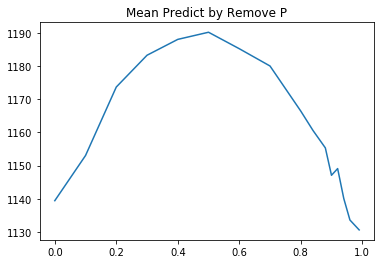

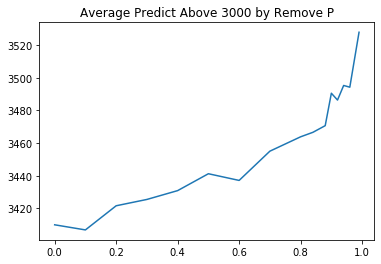

In [11]:
#Here I looked at mean predict by remove p and then look at them for the best values
df1=er3.groupby(er3['remove_p']).aggregate(np.mean)
plt.plot(df1.index,df1["mean_pred"])
plt.title("Mean Predict by Remove P")
plt.show()
df2=er3.groupby(er3['exp_num']).aggregate(np.mean)
best=df2[df2['mean_pred'] > 3000]
#Next line is becasue of rounding errors
best['remove_p']= np.round(best['remove_p'],decimals=2)
bestest = best.groupby(best['remove_p']).aggregate(np.mean)
plt.plot(bestest.index,bestest["mean_pred"])
plt.title("Average Predict Above 3000 by Remove P")
plt.show()

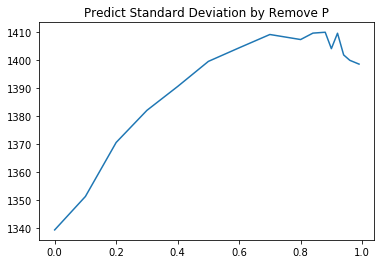

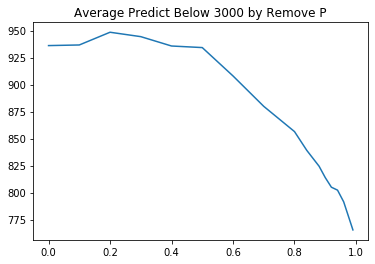

In [9]:
#I was curious of why there was a spike, but the mean didn't change, so I looked at the standard deviation and below 3000
df1=er3.groupby(er3['remove_p']).aggregate(np.var)
plt.plot(df1.index,np.sqrt(df1["mean_pred"]))
plt.title("Predict Standard Deviation by Remove P")
plt.show()
df2=er3.groupby(er3['exp_num']).aggregate(np.mean)
worst=df2[df2['mean_pred'] <= 3000]
#Next line is becasue of rounding errors
worst['remove_p']= np.round(worst['remove_p'],decimals=2)
worstest = worst.groupby(worst['remove_p']).aggregate(np.mean)
plt.plot(worstest.index,worstest["mean_pred"])
plt.title("Average Predict Below 3000 by Remove P")
plt.show()

This is when I realized that the graphs above with a nice curve up and down were only looking at all of the point above and below 3000 and might be entirely because of high standard deviation. So I wanted to know if given hyperparameters where remove_p of zero produced high results would the results get higher?

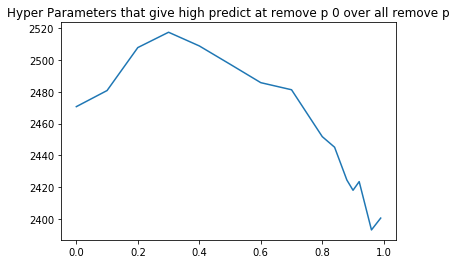

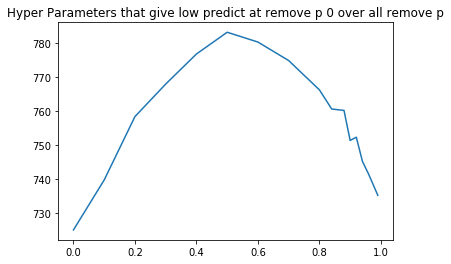

In [6]:
df2=er3.groupby(er3['exp_num']).aggregate(np.mean)
#Finds hyper parameters that have high mean predict
better = df2['hyper_param'][df2['mean_pred'] > 3000][df2['remove_p']==0]
best=df2[df2.hyper_param.isin(better)]
worst=df2[~df2.hyper_param.isin(better)]
#Next lines are becasue of rounding errors
best['remove_p']= np.round(best['remove_p'],decimals=2)
worst['remove_p']= np.round(worst['remove_p'],decimals=2)
bestest = best.groupby(best['remove_p']).aggregate(np.mean)
plt.plot(bestest.index,(bestest["mean_pred"]))
plt.title("Hyper Parameters that give high predict at remove p 0 over all remove p")
plt.show()
worstest = worst.groupby(worst['remove_p']).aggregate(np.mean)
plt.plot(worstest.index,(worstest["mean_pred"]))
plt.title("Hyper Parameters that give low predict at remove p 0 over all remove p")
plt.show()

So it doesn't look like remove p is actually helping good hyperparameters, but it is increasing variance wich might be good or might be bad. Depending on what your trying to do. Here is a boxplot to see the spread.

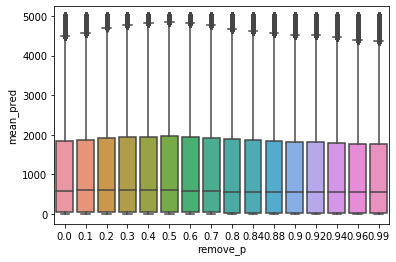

In [7]:
sb.boxplot(er3['remove_p'],er3['mean_pred'])

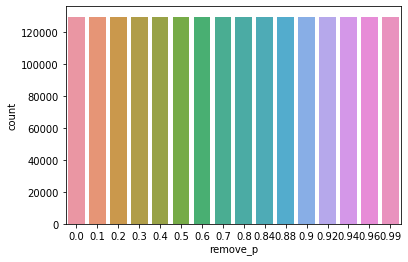

In [8]:
sb.countplot(er3['remove_p'])
#This shows that the better data is almost completely filled in

[0.4, 0.46496815286624205, 0.15934065934065933, 0.15028901734104047, 0.3114754098360656, 0.6488095238095238, 0.6178861788617886, 0.2606060606060606, 0.550561797752809, 0.43846153846153846, 0.39263803680981596, 0.2681564245810056, 0.4678362573099415, 0.3469387755102041, 0.25]


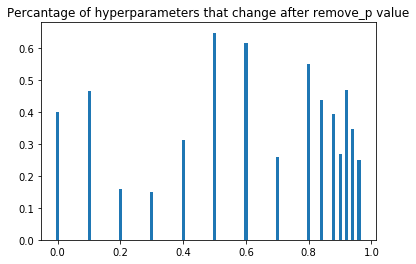

Percentage of Hyperparameters that have values above 3000 for any remove_p 0.4701348747591522
Percentage of Hyperparameters that have values above 3000 for any remove_p 0 0.11560693641618497
Percentage of Hyperparameters that have values above 3000 for any remove_p .9 0.15606936416184972


In [35]:
def hyper_shift(data,threshold = 3000):
    """Returns list of the percantage of hyper"""
    data1 = data.groupby(data['exp_num']).aggregate(np.mean)
    data1['remove_p']= np.round(data1['remove_p'],decimals=2)
    data2 = data1[data1['mean_pred']>threshold]
    remove_p_vals = data2.remove_p.unique()
    params = []
    for p in remove_p_vals:
        params.append(set(data2['hyper_param'][data2['remove_p'] == p]))
    differences = []
    for i in range(len(remove_p_vals)-1):
        differences.append(len((params[i] - params[i+1]) | (params[i+1] - params[i]))/len(params[i]))
    return differences

#Run hyper_shift then plot it
differences = hyper_shift(er3)
print(differences)
plt.bar(er3.remove_p.unique()[:-1],differences,width=.01)
plt.title("Percantage of hyperparameters that change after remove_p value")
plt.show()

#
data1 = er3.groupby(er3['exp_num']).aggregate(np.mean)
data1['remove_p']= np.round(data1['remove_p'],decimals=2)
data2 = data1[data1['mean_pred']>3000]
print("Percentage of Hyperparameters that have values above 3000 for any remove_p",len(set(data2['hyper_param']))/len(set(er3['hyper_param'])))
print("Percentage of Hyperparameters that have values above 3000 for any remove_p 0",len(set(data2['hyper_param'][er3['remove_p']==0]))/len(set(er3['hyper_param'])))
print("Percentage of Hyperparameters that have values above 3000 for any remove_p .9",len(set(data2['hyper_param'][er3['remove_p']==.9]))/len(set(er3['hyper_param'])))